In [1]:
import dataretrieval.nwis as nwis
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import cartopy.crs as ccrs
import cartopy
import numpy as np

In [2]:
def drop_nan_var(ds,var):
    if ds[var].isnull().all():
        ds = ds.drop_vars(var)
    return ds

def var_to_float(ds,var):
    if var.startswith('p'):
        ds[var] = ds[var].to_series().apply(lambda x: pd.to_numeric(x, errors='coerce')).to_xarray()
    return ds

In [3]:
main = "C:\\Users\\andfa\\OneDrive\\Documents\\2024 Spring\\tidal_rivers\\TX2_WQ\\"

In [4]:
tx2 = xr.open_dataset(main+"tx2.nc")

In [5]:
tx2

<xarray.Dataset>
Dimensions:                     (sample_dt: 693)
Coordinates:
  * sample_dt                   (sample_dt) datetime64[ns] 1964-02-01 ... 202...
Data variables: (12/88)
    agency_cd                   (sample_dt) object ...
    site_no                     (sample_dt) object ...
    sample_end_dt               (sample_dt) datetime64[ns] ...
    sample_start_time_datum_cd  (sample_dt) object ...
    tm_datum_rlbty_cd           (sample_dt) object ...
    coll_ent_cd                 (sample_dt) object ...
    ...                          ...
    p71851                      (sample_dt) float64 ...
    p71856                      (sample_dt) float64 ...
    p71999                      (sample_dt) float64 ...
    p82398                      (sample_dt) float64 ...
    p90095                      (sample_dt) float64 ...
    p39086                      (sample_dt) float64 ...

# Ploting all good timeseries

In [6]:
var01 = 'p00010'
var02 = 'p00061'
var03 = 'p00095'
var04 = 'p00191'
var05 = 'p00300'
var06 = 'p00301'
var07 = 'p00400'
var08 = 'p00403'
var09 = 'p00602'
var10 = 'p00613'
var11 = 'p00618'
var12 = 'p00623'
var13 = 'p00631'
var14 = 'p00660'
var15 = 'p00666'
var16 = 'p00671'
var17 = 'p00900'
var18 = 'p00904'
var19 = 'p00915'
var20 = 'p00925'
var21 = 'p00930'
var22 = 'p00931'
var23 = 'p00932'
var24 = 'p00940'
var25 = 'p00945'
var26 = 'p00950'
var27 = 'p00955'

var_list = [var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27]

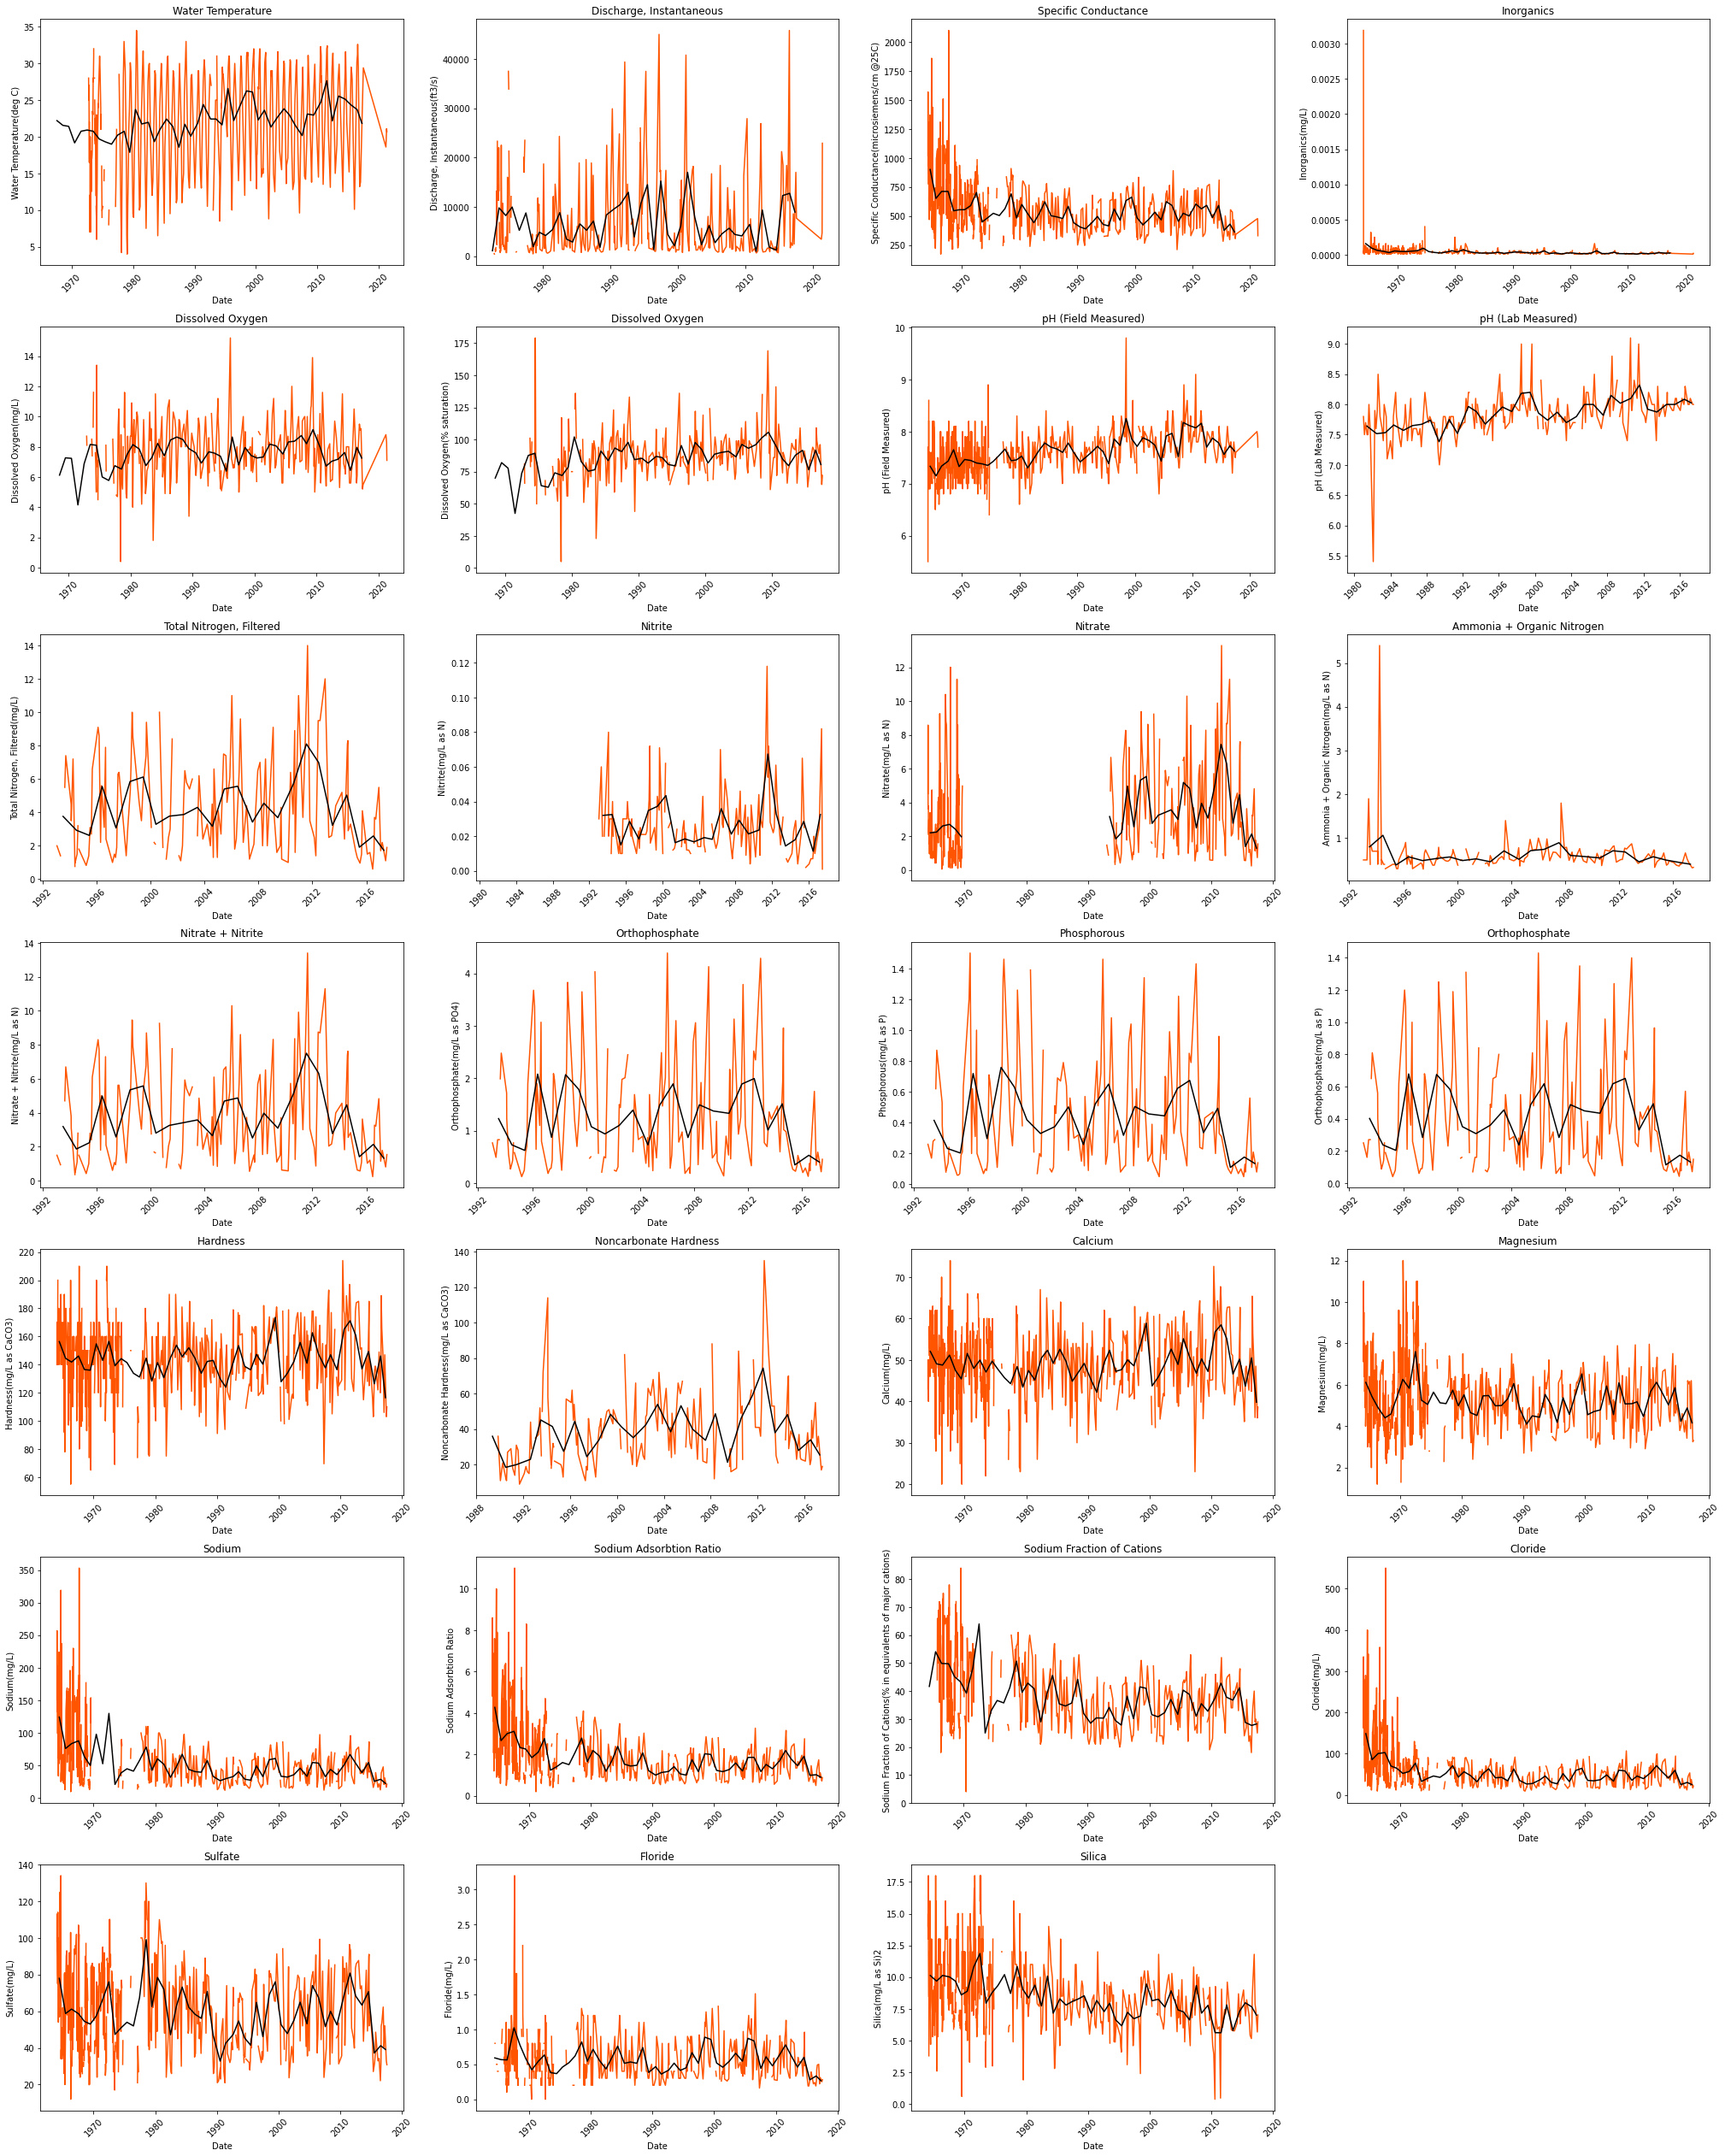

In [7]:
plt.figure(figsize=(35,45))

for n in range(1,28):
    plt.subplot(7,4,n)
    plt.plot(tx2.sample_dt, tx2[var_list[n-1]],color='#FF5500',label='all data points')
    plt.plot(tx2.sample_dt.resample(sample_dt='Y').mean(), tx2[var_list[n-1]].resample(sample_dt='Y').mean(),color='k',label='annual average value')
    plt.xlabel(tx2.sample_dt.attrs['Name'])
    plt.ylabel(tx2[var_list[n-1]].attrs['Name'] + tx2[var_list[n-1]].attrs['Units'])
    plt.xticks(rotation=45)
    plt.title(tx2[var_list[n-1]].attrs['Name'])

plt.subplots_adjust(hspace=0.25)

In [9]:
tx2.p00940.attrs['Name']  = 'Chloride'
tx2.p00940.attrs['Units'] = '(mg/L)'

# Selective plotting

In [6]:
plt.rcParams['font.size'] = 18

In [7]:
var_list = ['p00010','p00061','p00300','p00400','p00602','p00666','p00915','p00930','p00940','p00945','p00955']

In [12]:
for var in var_list:
    plt.figure(figsize=(20,10))
    tx2[var].plot(color='#FF5500',label='all data points')
    tx2[var].resample(sample_dt='Y').mean().plot(color='k',label='annual average value')
    plt.xlabel(tx2.sample_dt.attrs['Name'])
    plt.xlim(pd.Timestamp('1990-01-01'),pd.Timestamp('2021-12-31'))
    years = mdates.YearLocator(2)   # every year
    years_fmt = mdates.DateFormatter('%Y')
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    plt.ylabel(tx2[var].attrs['Name'] + ' ' + tx2[var].attrs['Units'])
    plt.legend()
    plt.title(tx2[var].attrs['Name'])
    plt.savefig(main + var + '.png')
    plt.clf()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

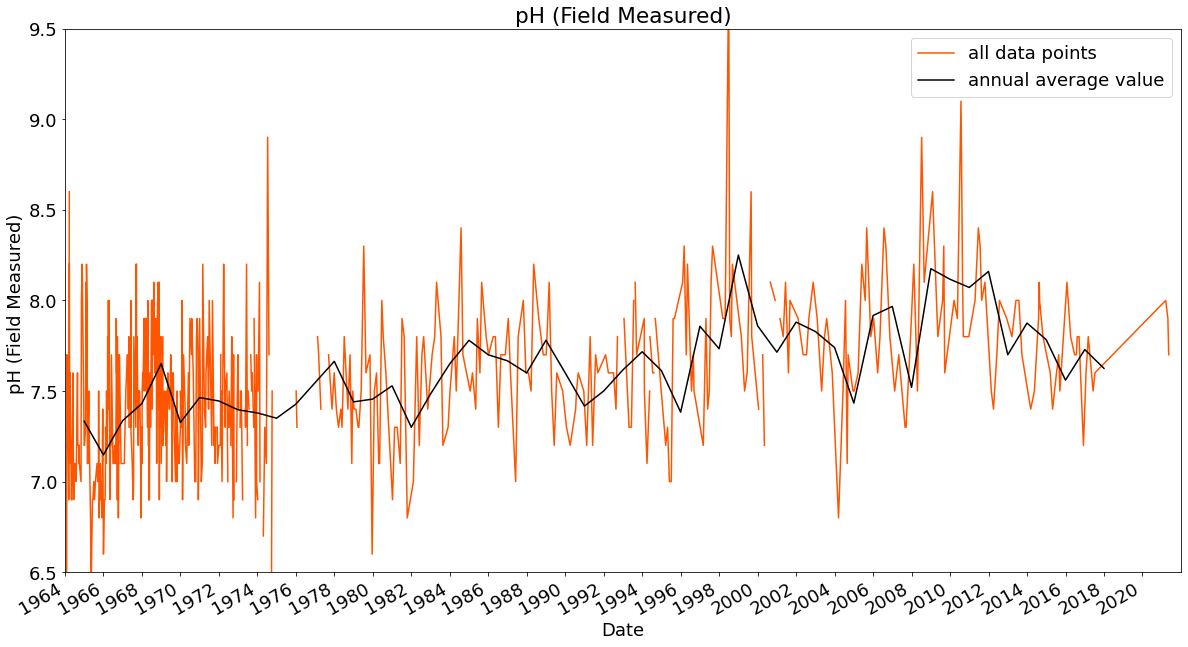

In [11]:
var='p00631'
plt.figure(figsize=(20,10))
tx2[var].plot(color='#FF5500',label='all data points')
tx2[var].resample(sample_dt='Y').mean().plot(color='k',label='annual average value')
plt.xlabel(tx2.sample_dt.attrs['Name'])
plt.xlim(pd.Timestamp('1993-01-01'),pd.Timestamp('2021-12-31'))
years = mdates.YearLocator(2)   # every year
years_fmt = mdates.DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.ylabel(tx2[var].attrs['Name'] + ' ' + tx2[var].attrs['Units'])

plt.ylim(6.5,9.5)

plt.legend()
plt.title(tx2[var].attrs['Name'])
plt.savefig(main + var + '.png')